In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

<IPython.core.display.Javascript object>

## Data Overview

In [3]:
# loading the dataset
data = pd.read_csv(r"C:\Users\lostsemsem\Desktop\P7\fpl_data.csv")

<IPython.core.display.Javascript object>

In [4]:
data.shape

(476, 13)

<IPython.core.display.Javascript object>

In [5]:
# viewing the first 5 rows of the data
data.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


<IPython.core.display.Javascript object>

In [6]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [7]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


<IPython.core.display.Javascript object>

### Data Preprocessing

In [8]:
# checking for missing values
df.isnull().sum()

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# Are there any duplicate values?
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [13]:
# fixing data types
df["Player_Name"] = df["Player_Name"].astype("category")
df["Club"] = df["Club"].astype("category")
df["Position"] = df["Position"].astype("category")

<IPython.core.display.Javascript object>

### Describtive Statistics 

In [11]:
df.describe()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,1.907563,1.752101,58.516807,1336.909664,19.157563,195.976050,294.617647,224.962185,4.718487,4.745798
std,3.455562,2.708563,51.293559,1073.773995,15.946171,251.478541,267.779681,318.240377,6.252625,4.394312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,268.750000,4.000000,8.300000,46.500000,5.750000,0.000000,0.000000
50%,0.500000,0.000000,48.000000,1269.500000,18.000000,96.950000,233.100000,104.500000,2.000000,4.000000
75%,2.000000,2.000000,94.250000,2256.250000,31.000000,296.950000,499.500000,298.250000,7.000000,8.000000
max,23.000000,14.000000,244.000000,3420.000000,68.000000,1414.900000,1318.200000,1980.000000,40.000000,19.000000


<IPython.core.display.Javascript object>

In [14]:
df.describe(include=["category"]).T

,count,unique,top,freq
Player_Name,476,476,Zack Steffen,1
Club,476,17,Arsenal,30
Position,476,4,Midfielder,195


<IPython.core.display.Javascript object>

In [15]:
df["Club"].value_counts()

Arsenal                     30
Crystal Palace              30
West Ham United             29
Leeds United                29
Leicester City              29
Newcastle United            29
Tottenham Hotspurs          29
Manchester United           28
Chelsea                     28
Brighton and Hove Albion    28
Manchester City             27
Liverpool                   27
Southampton                 27
Everton                     27
Burnley                     27
Aston Villa                 26
Wolverhampton Wanderers     26
Name: Club, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
df["Position"].value_counts()

Midfielder    195
Defender      172
Forward        64
Goalkeeper     45
Name: Position, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
print(df.groupby("Club")["Total_Points"].mean())

Club
Arsenal                     54.400000
Aston Villa                 65.615385
Brighton and Hove Albion    53.464286
Burnley                     52.925926
Chelsea                     67.142857
Crystal Palace              45.966667
Everton                     58.629630
Leeds United                58.310345
Leicester City              57.896552
Liverpool                   66.851852
Manchester City             78.666667
Manchester United           63.214286
Newcastle United            45.758621
Southampton                 54.259259
Tottenham Hotspurs          60.689655
West Ham United             58.137931
Wolverhampton Wanderers     55.423077
Name: Total_Points, dtype: float64


<IPython.core.display.Javascript object>

In [39]:
print(df.groupby("Position")["Total_Points"].mean())

Position
Defender      53.517442
Forward       60.812500
Goalkeeper    55.133333
Midfielder    62.953846
Name: Total_Points, dtype: float64


<IPython.core.display.Javascript object>

In [40]:
print(df.groupby("Position")["Minutes"].mean())

Position
Defender      1367.453488
Forward       1088.937500
Goalkeeper    1291.911111
Midfielder    1401.738462
Name: Minutes, dtype: float64


<IPython.core.display.Javascript object>

In [41]:
print(df.groupby("Club")["Bonus"].mean())

Club
Arsenal                     4.600000
Aston Villa                 5.038462
Brighton and Hove Albion    4.071429
Burnley                     3.777778
Chelsea                     5.642857
Crystal Palace              3.700000
Everton                     4.888889
Leeds United                4.517241
Leicester City              4.965517
Liverpool                   5.185185
Manchester City             7.333333
Manchester United           5.357143
Newcastle United            3.275862
Southampton                 4.111111
Tottenham Hotspurs          4.896552
West Ham United             4.655172
Wolverhampton Wanderers     4.384615
Name: Bonus, dtype: float64


<IPython.core.display.Javascript object>

**Questions**:

1. What does the distribution of total fantasy points scored by players look like?
2. Players from which team have scored the most fantasy points on average?
3. Players in different positions have specific roles to play in a team. How does the average fantasy points differ across positions?
4. To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. How does the total number of minutes played, on average, vary across different positions?
5. Every point counts in fantasy sports and getting bonus points for a player is always a treat. Which team's players have secured the most bonus points on average?

**Answers**:

Q1. What does the distribution of total fantasy points scored by players look like?

- The goals scored by all the players distribution is right skewed with mean 1.9 and median 0.5 and that's maybe because most of the players in our dataset has value 0 that indicates they didn't scored any goals such as defender and goalkeepers.

Q2. Players from which team have scored the most fantasy points on average?
- The team which have scores most fantasy points on average is Manchester City ~ 78.67

Q3. Players in different positions have specific roles to play in a team. How does the average fantasy points differ across positions?
- Midfielders has the most fantasy points on average ~63 follwed by Forwards ~61, Goalkeepers ~55 and Defenders ~53.52

Q4. How does the total number of minutes played, on average, vary across different positions?
- The number of minutes played by Midfielders comes as the most with 1401 on average followed by Defenders , Goalkeepers and Forwards respectively.

Q5. Which team's players have secured the most bonus points on average?
- Again Manchester City players have secured the most bonus on average and that is expected as they are the team which have the most fantasy score on average also.

**We will have a lock at the visualization for each question in the bivariate analysis**.

###  Univariate Data Analaysis
let's check the categorical variables first 

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

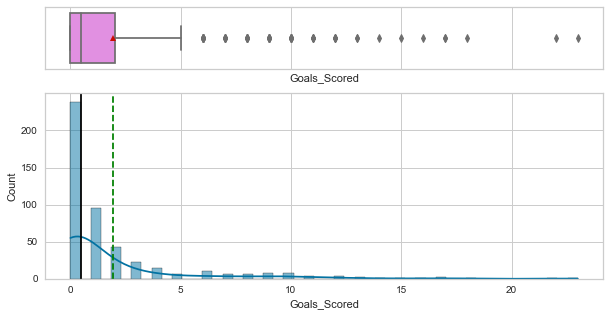

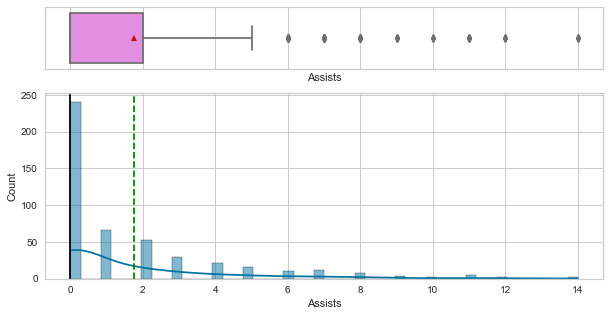

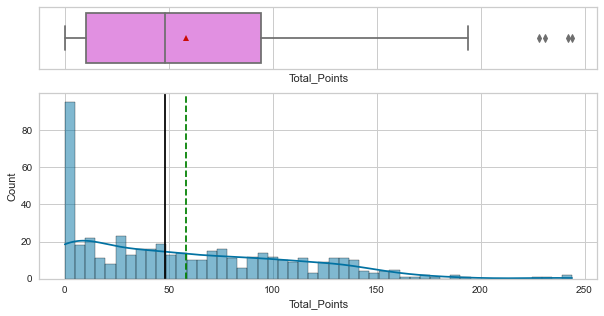

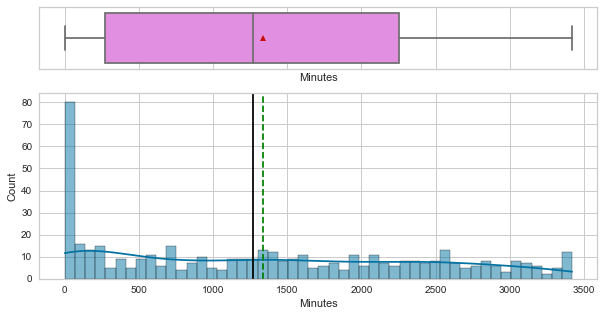

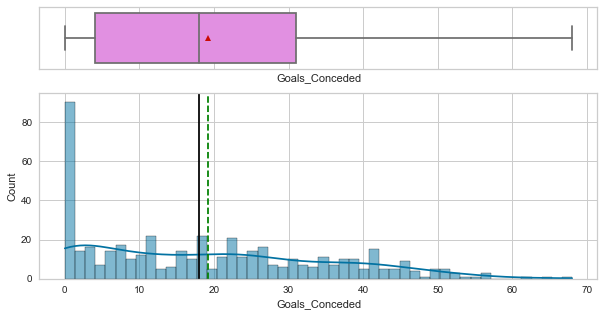

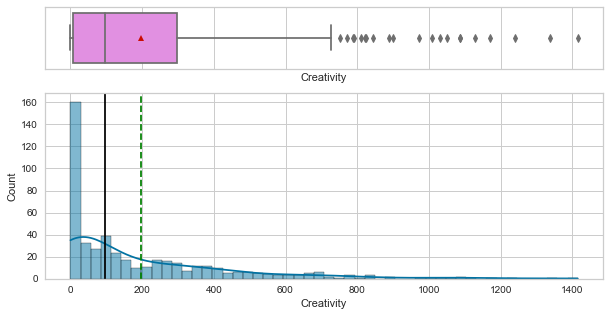

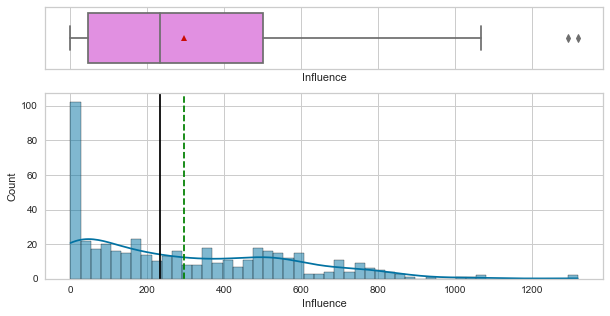

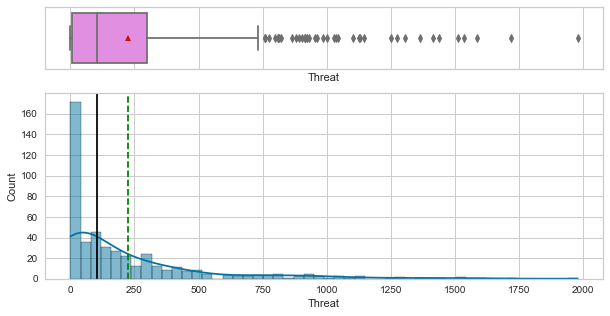

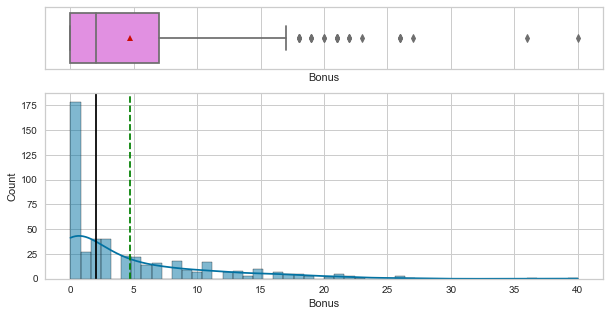

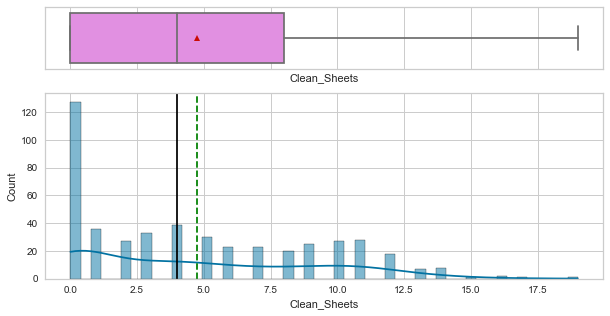

<IPython.core.display.Javascript object>

In [18]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

- The goals scored by all the players distribution is right skewed with mean 1.9 and median 0.5 and that's maybe because most of the players in our dataset has value 0 that indicates they didn't scored any goals such as defender and goalkeepers
- There are considerable number of outliers in goals scored column and that's also expected as there are dominant players. 

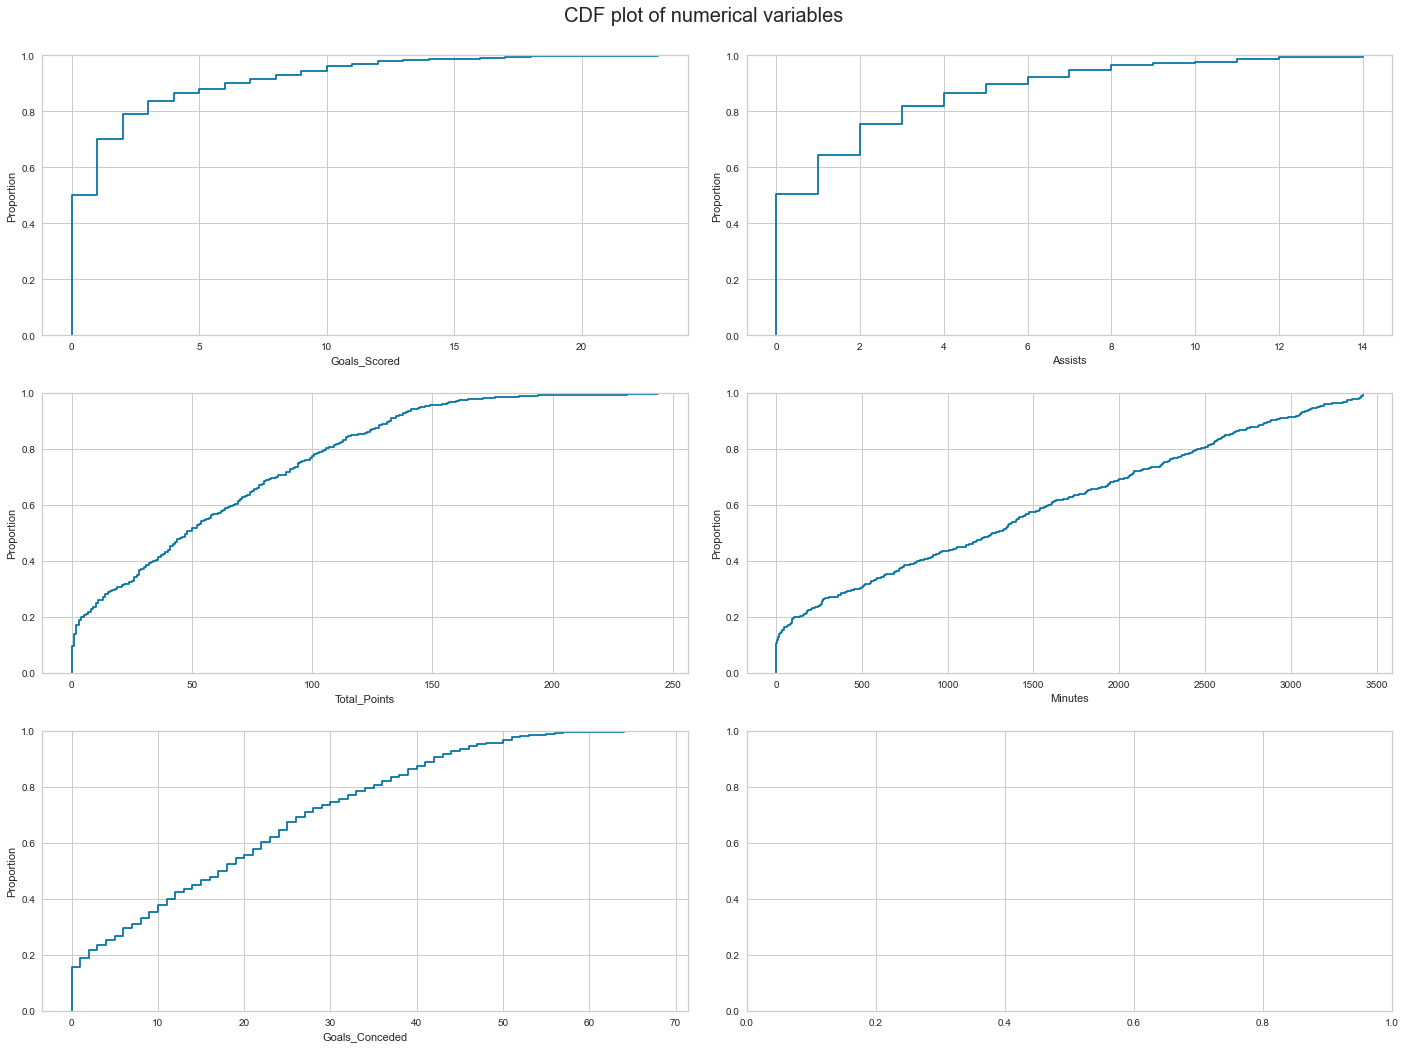

<IPython.core.display.Javascript object>

In [51]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_cols[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_cols[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

## Bivariate Analaysis

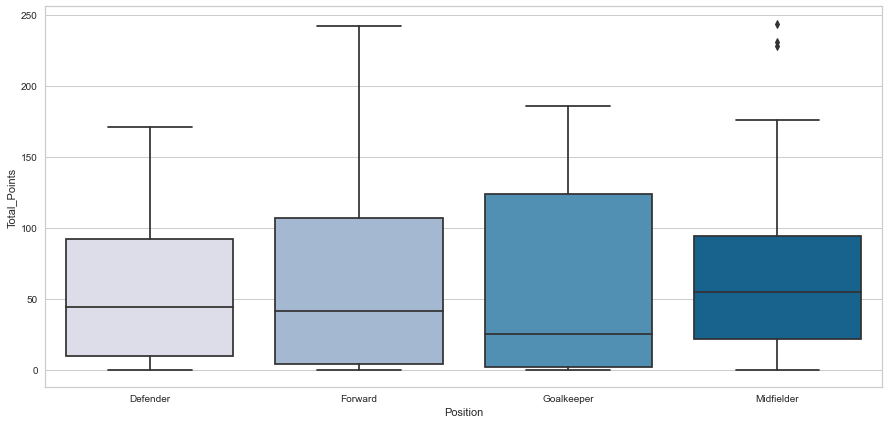

<IPython.core.display.Javascript object>

In [38]:
#Players in different positions have specific roles to play in a team. How does the average fantasy points differ across positions?
plt.figure(figsize=(15, 7))
sns.boxplot(df["Position"], df["Total_Points"], palette="PuBu")
plt.show()

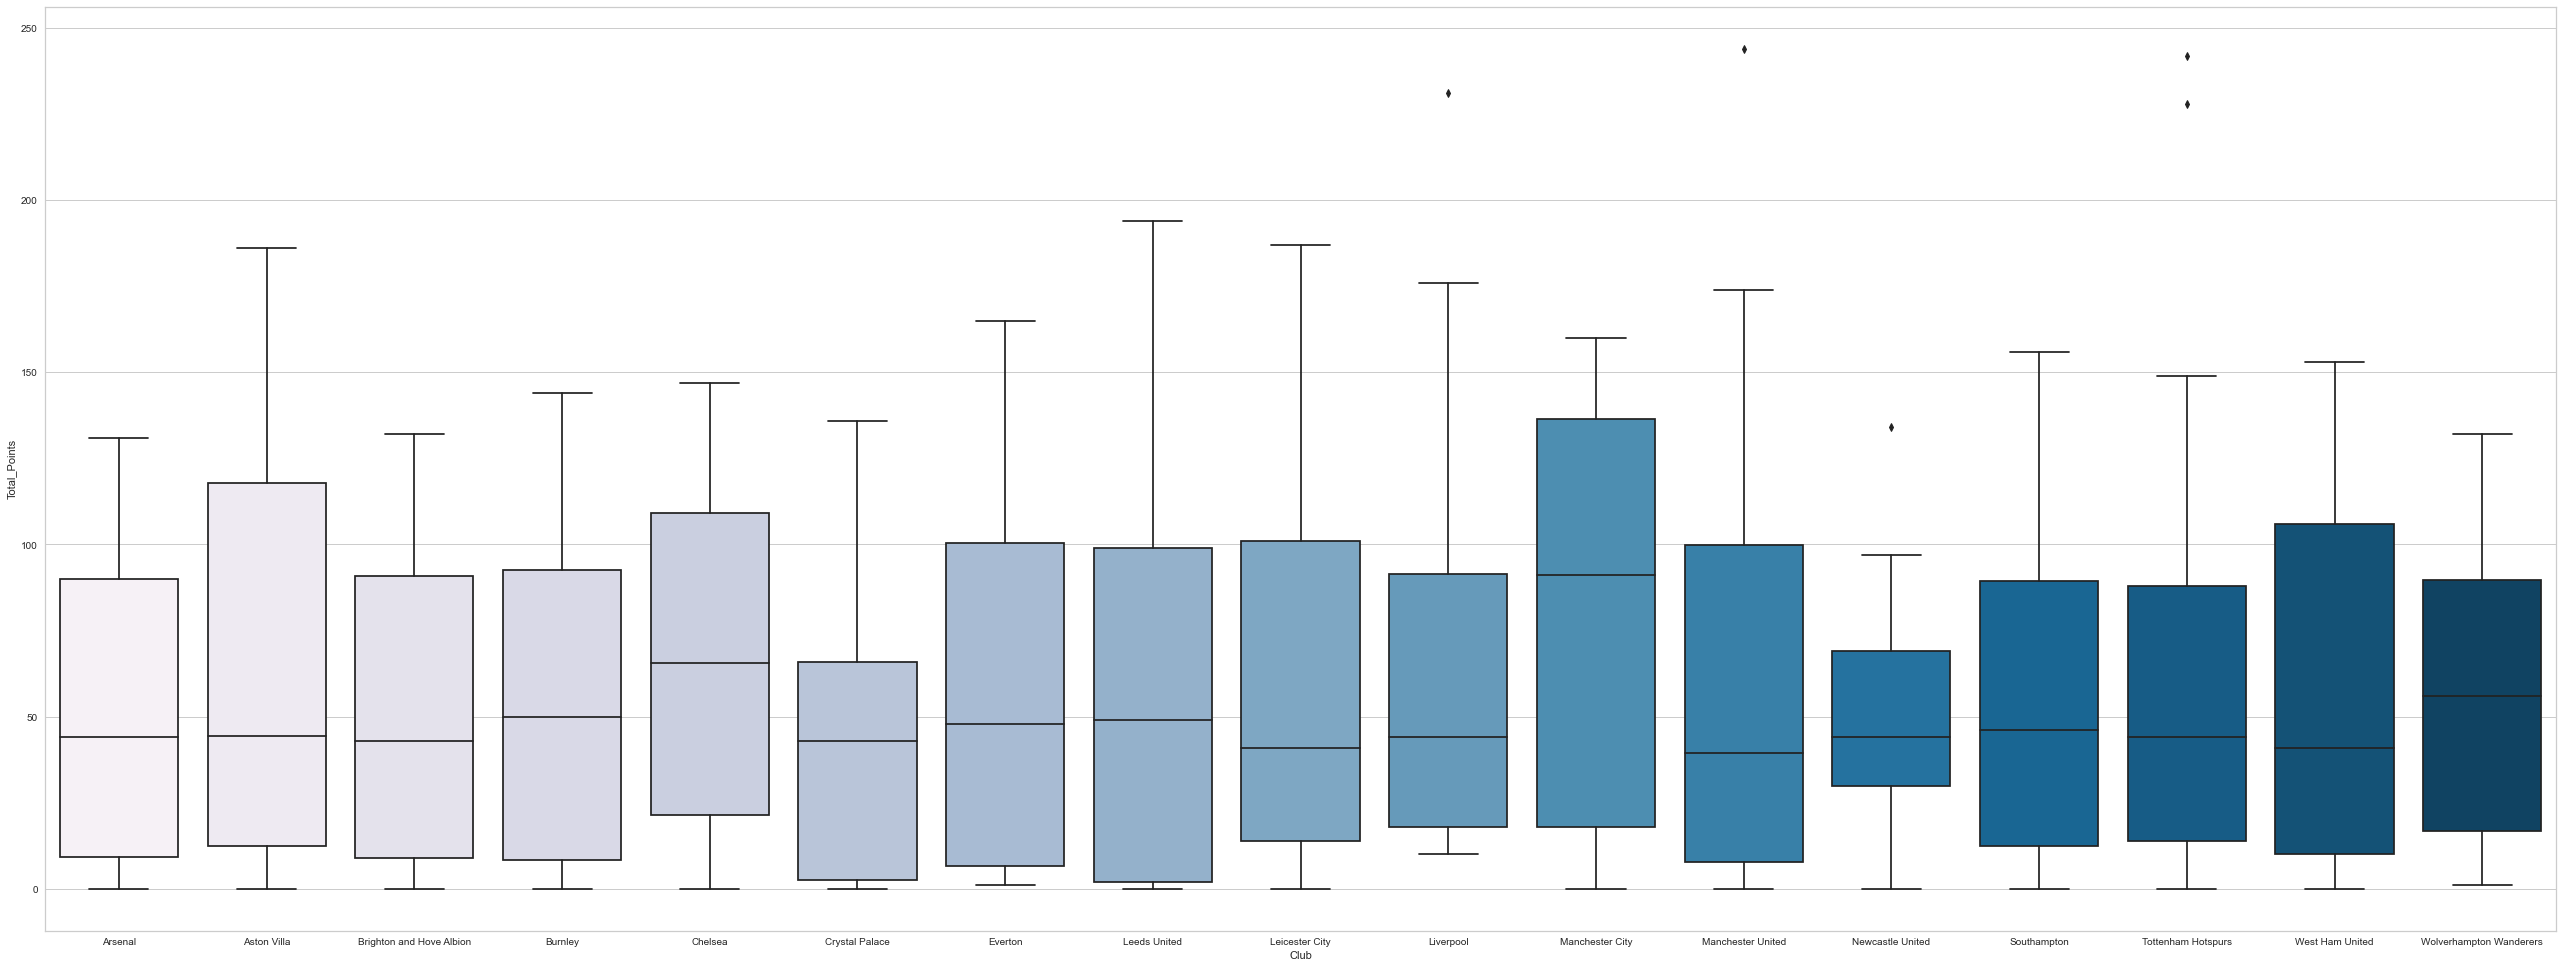

<IPython.core.display.Javascript object>

In [47]:
# Players from which team have scored the most fantasy points on average?
plt.figure(figsize=(45, 17))
sns.boxplot(df["Club"], df["Total_Points"], palette="PuBu")
plt.show()

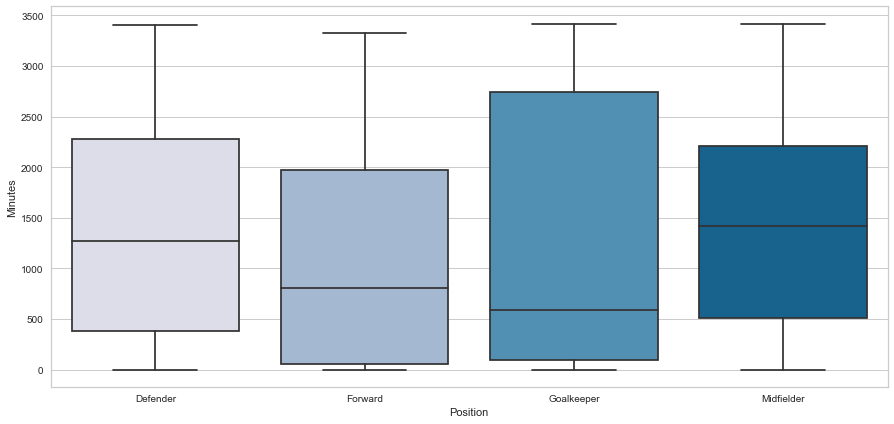

<IPython.core.display.Javascript object>

In [49]:
#  How does the total number of minutes played, on average, vary across different positions?
plt.figure(figsize=(15, 7))
sns.boxplot(df["Position"], df["Minutes"], palette="PuBu")
plt.show()

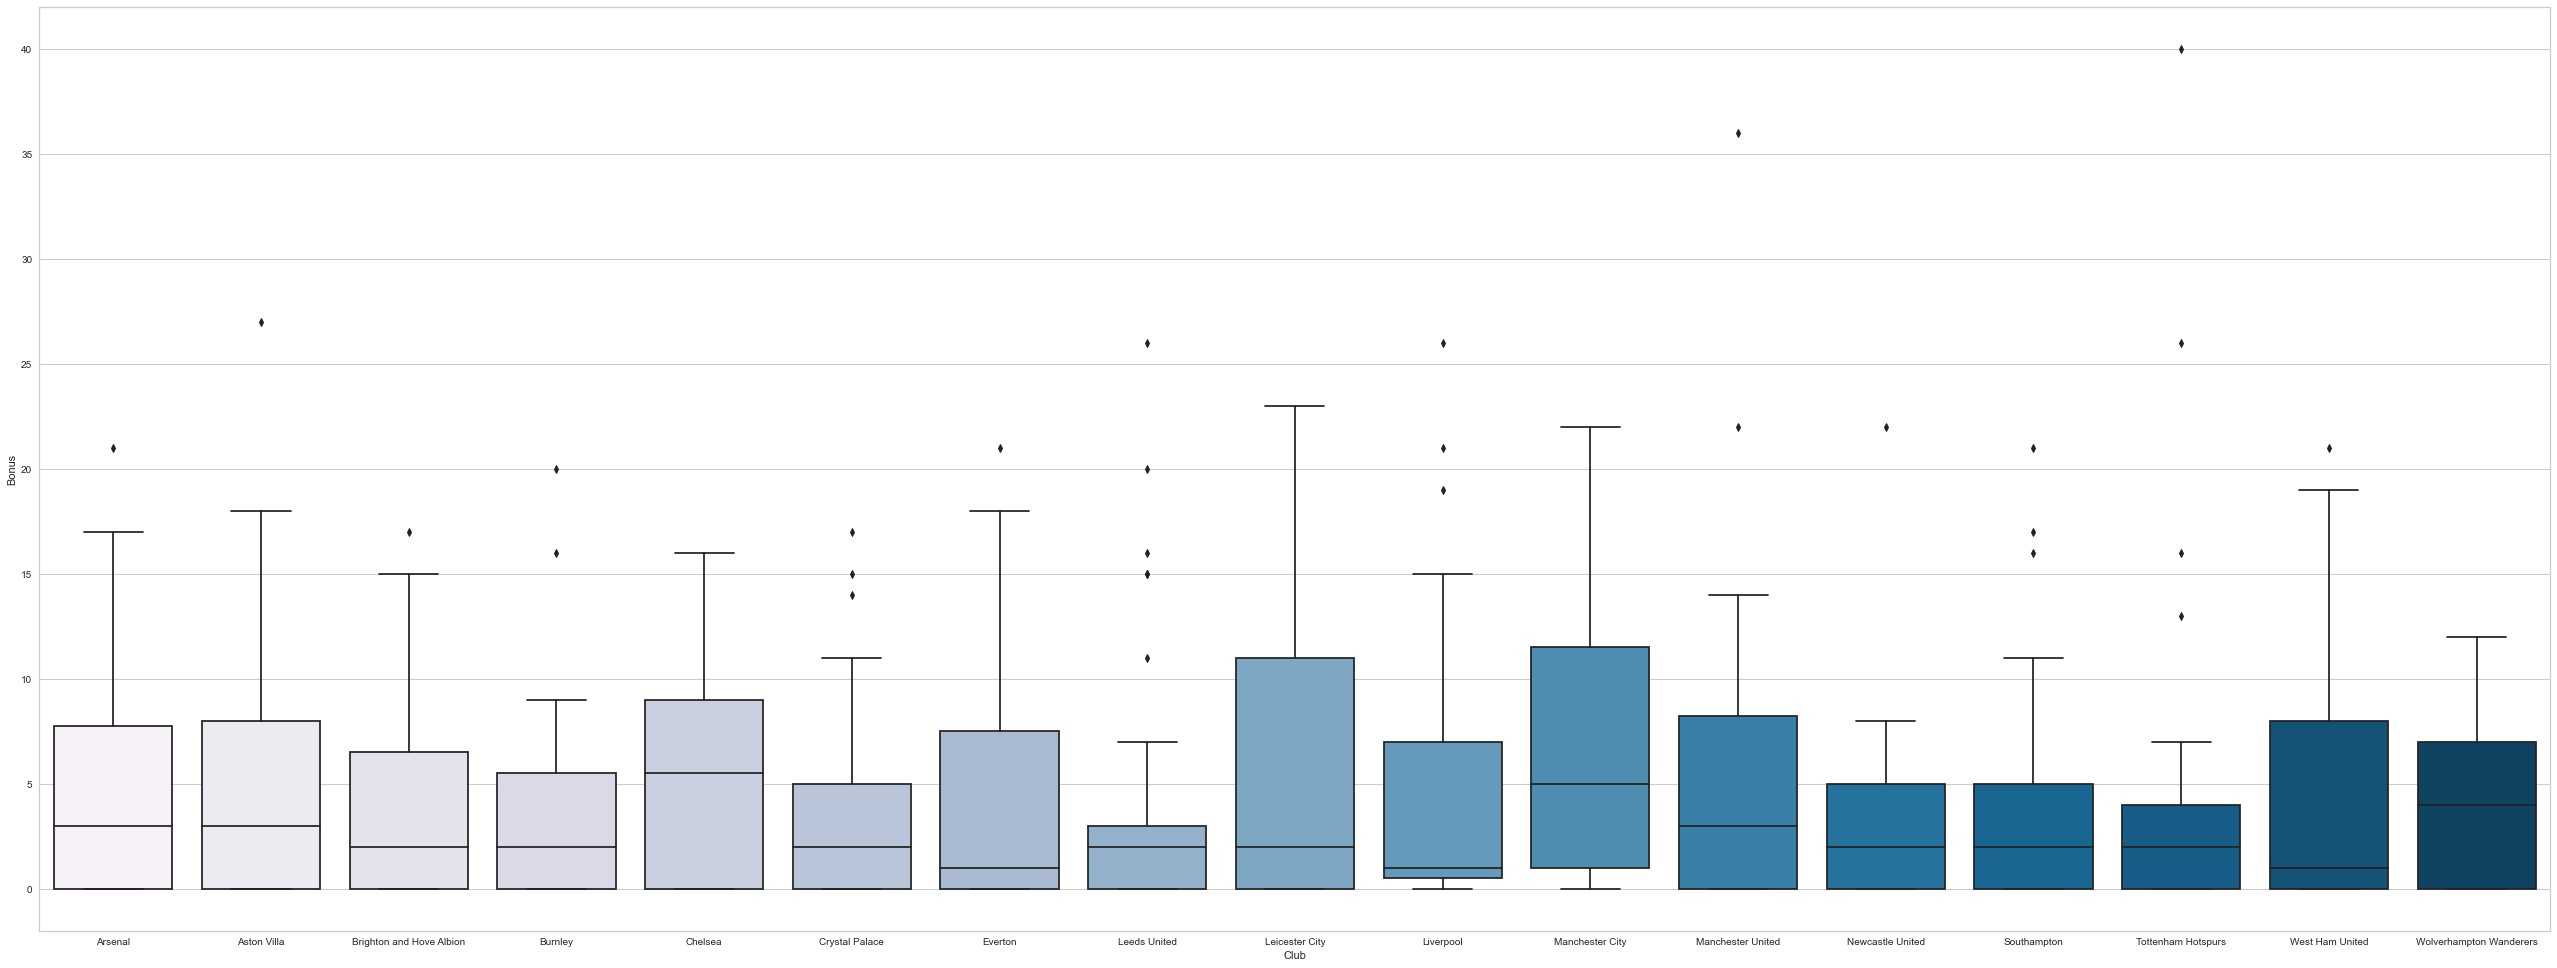

<IPython.core.display.Javascript object>

In [50]:
# Which team's players have secured the most bonus points on average?
plt.figure(figsize=(45, 17))
sns.boxplot(df["Club"], df["Bonus"], palette="PuBu")
plt.show()

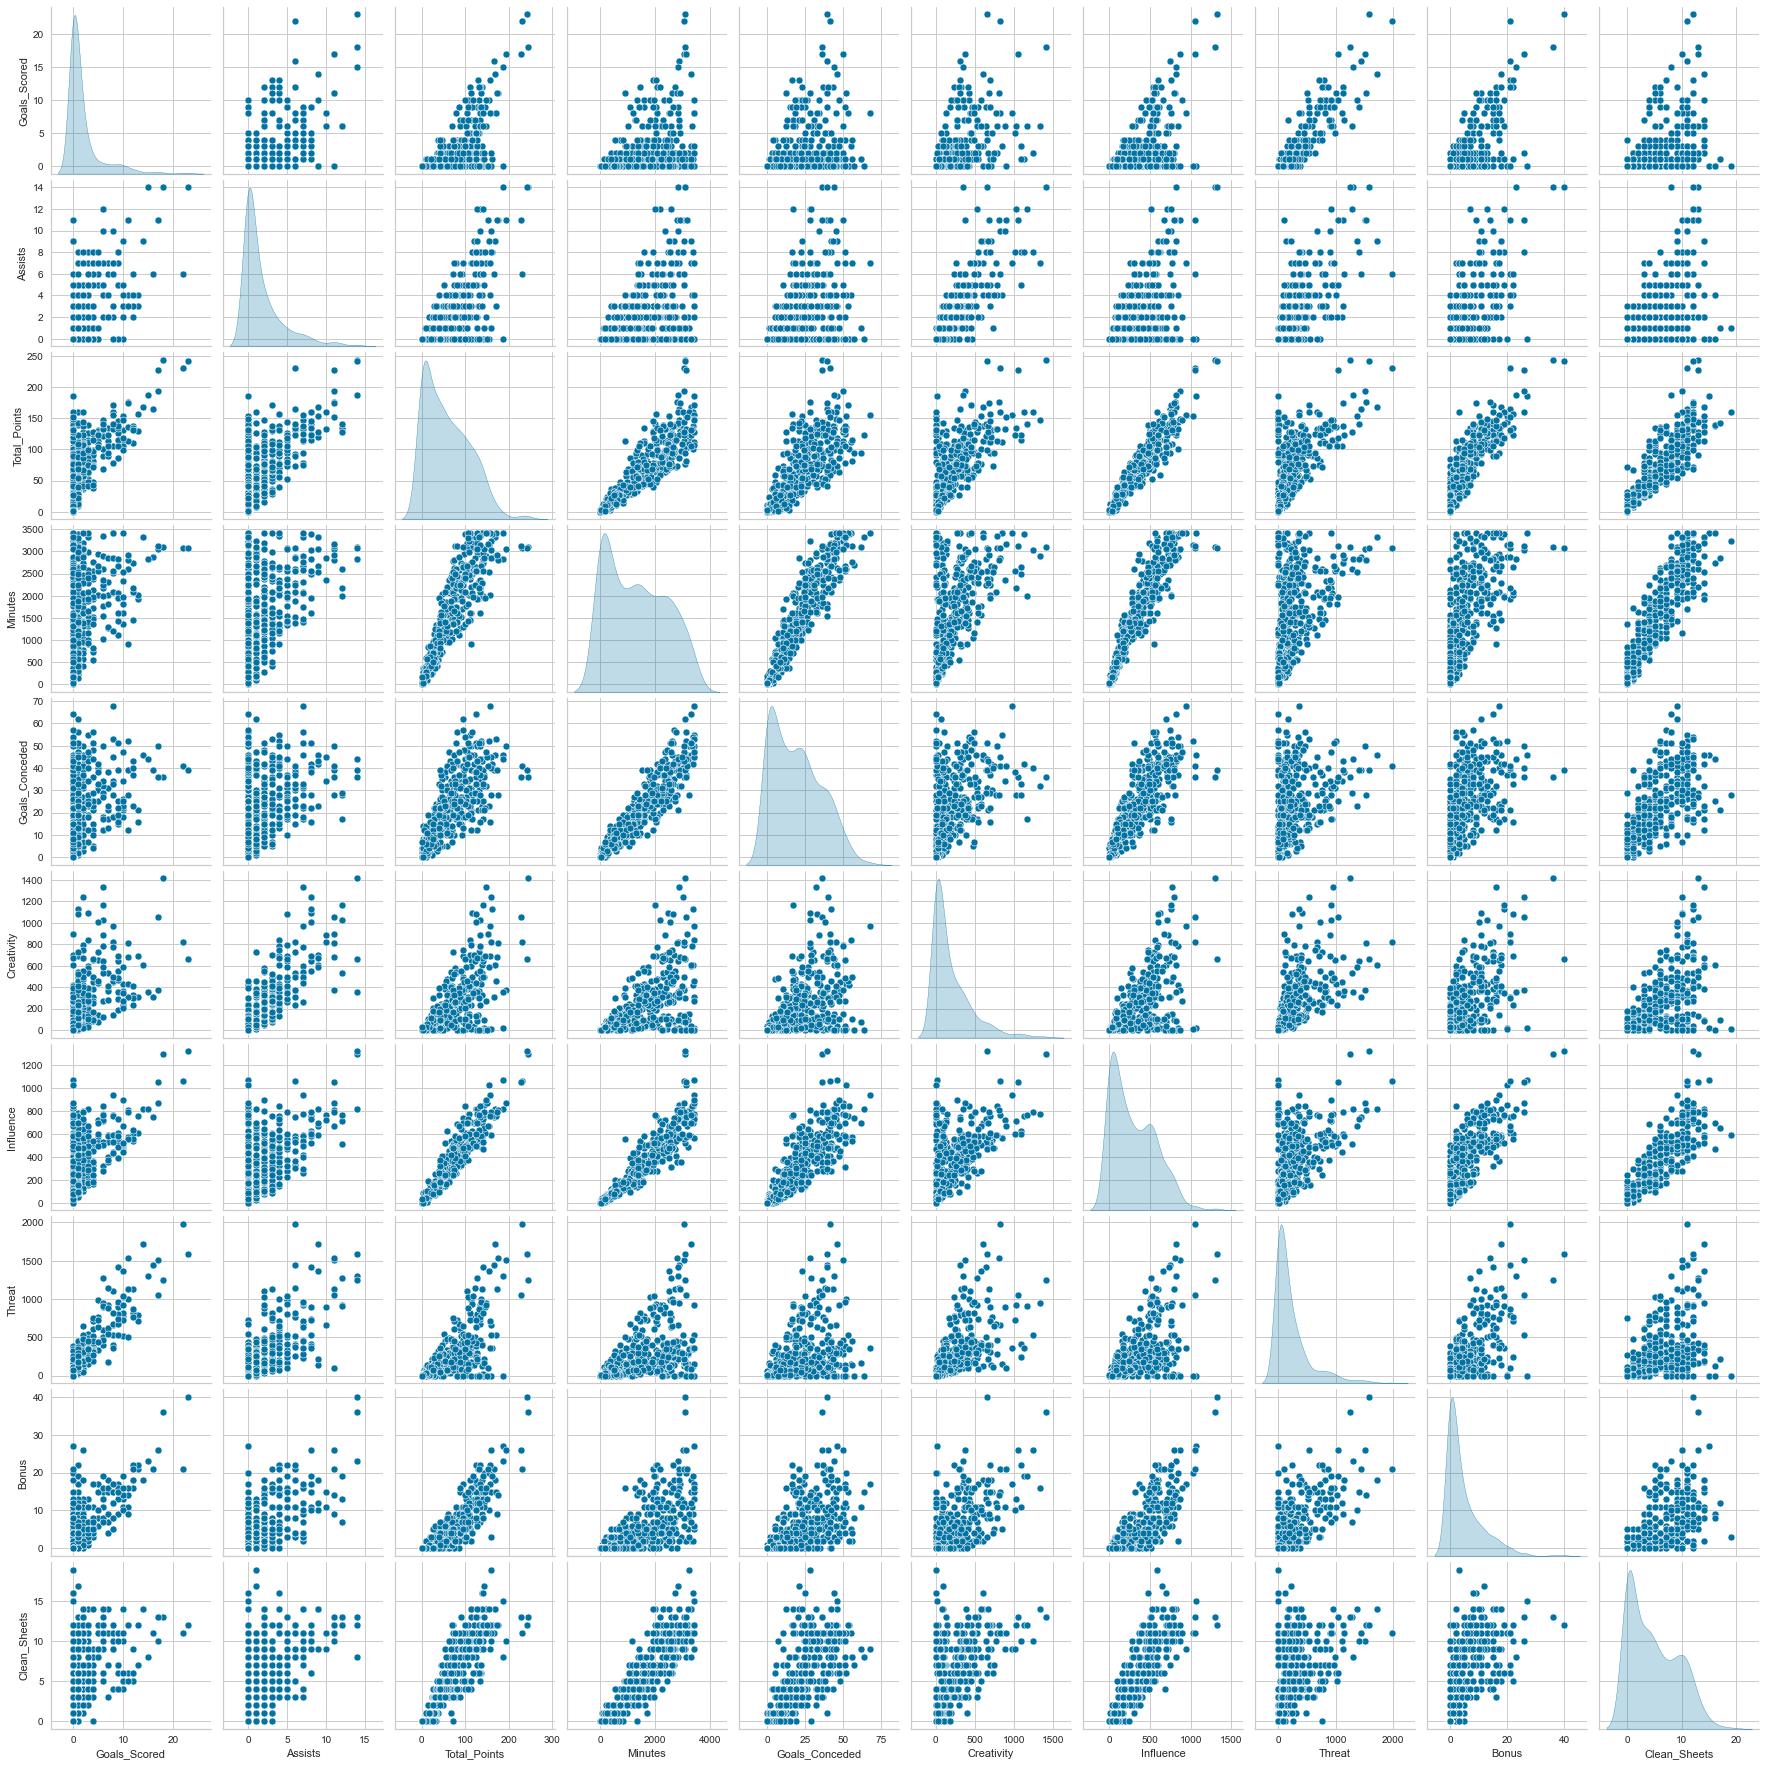

<IPython.core.display.Javascript object>

In [19]:
sns.pairplot(data=df[num_cols], diag_kind="kde")
plt.show()

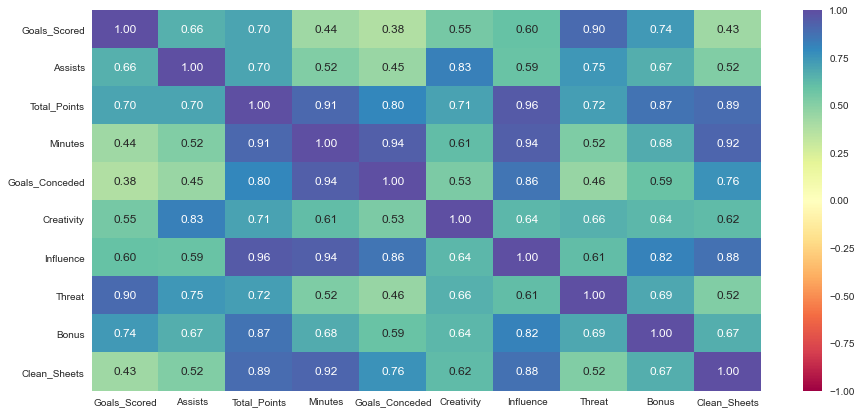

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation**:
- There are strong positive relatioship between goals scored , assists , total points and Bonus.



In [23]:
# variables used for clustering
num_cols

['Goals_Scored',
 'Assists',
 'Total_Points',
 'Minutes',
 'Goals_Conceded',
 'Creativity',
 'Influence',
 'Threat',
 'Bonus',
 'Clean_Sheets']

<IPython.core.display.Javascript object>

In [25]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [26]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-means Clustering

In [52]:
k_means_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.773037110097803
Number of Clusters: 2 	Average Distortion: 1.863573678589827
Number of Clusters: 3 	Average Distortion: 1.5612774038101604
Number of Clusters: 4 	Average Distortion: 1.3542782238901416
Number of Clusters: 5 	Average Distortion: 1.2931541699741689
Number of Clusters: 6 	Average Distortion: 1.225849543585495
Number of Clusters: 7 	Average Distortion: 1.16048401421345
Number of Clusters: 8 	Average Distortion: 1.109804758457438


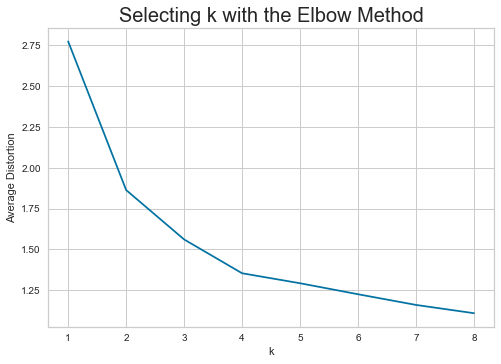

<IPython.core.display.Javascript object>

In [53]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**The appropriate value of k from the Elbow curve seems to be 3 or 4**.

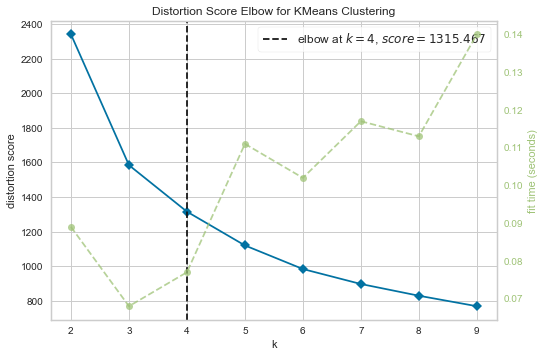

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [54]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Let's check the silhouette scores**.

In [55]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.48460299127690776)
For n_clusters = 3, the silhouette score is 0.4657385712264915)
For n_clusters = 4, the silhouette score is 0.4041321364385184)
For n_clusters = 5, the silhouette score is 0.41063881943698827)
For n_clusters = 6, the silhouette score is 0.41463610535548745)
For n_clusters = 7, the silhouette score is 0.3826908324316974)
For n_clusters = 8, the silhouette score is 0.3750329965069644)
For n_clusters = 9, the silhouette score is 0.3763672451125451)


<IPython.core.display.Javascript object>

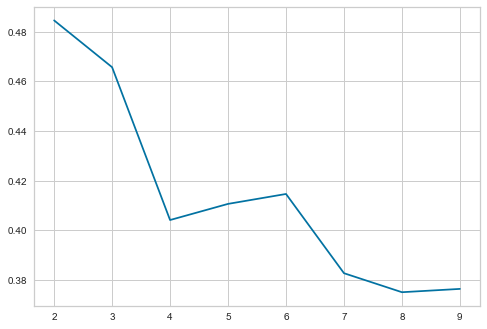

<IPython.core.display.Javascript object>

In [56]:
plt.plot(cluster_list, sil_score)
plt.show()

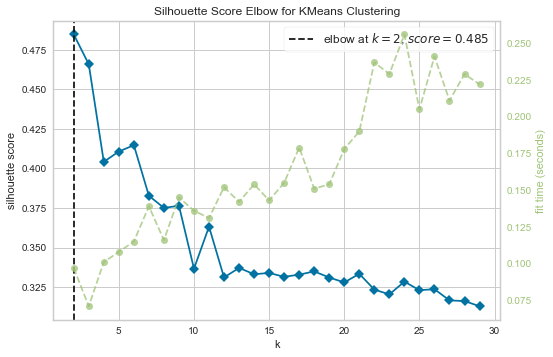

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [57]:
el = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 30), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**From the silhouette scores, it seems that 2 is a good value for k**.

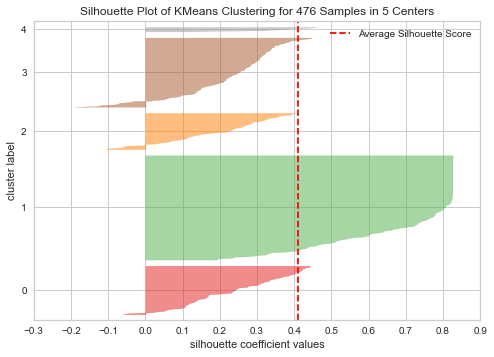

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [61]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

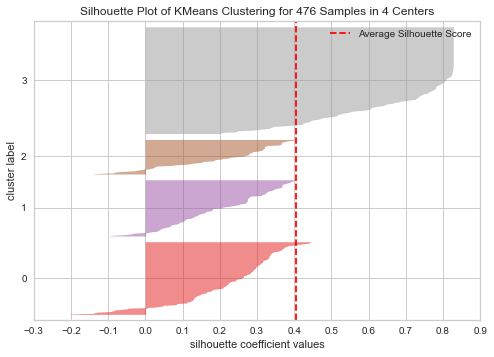

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [62]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

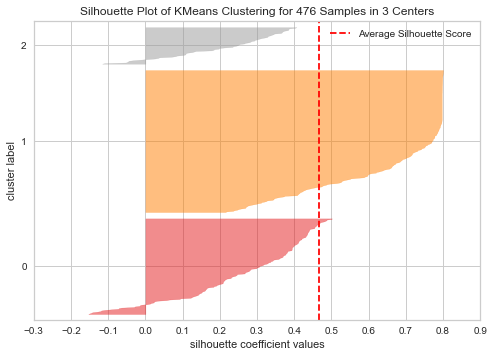

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [63]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

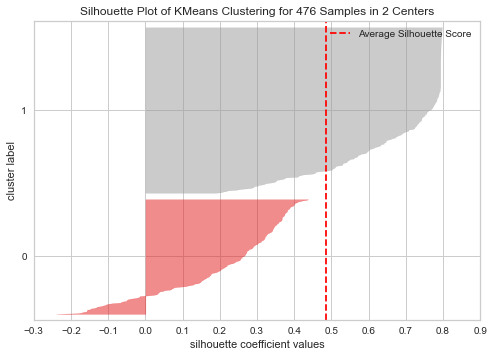

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [64]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observations

- The silhouette coefficient for 2 clusters is the highest but we will proceed with 3 clusters as they show more variability in the distribution .

In [109]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=0)

<IPython.core.display.Javascript object>

In [110]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Hierarchical Clustering

In [67]:
hc_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [68]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228705.
Cophenetic correlation for Euclidean distance and complete linkage is 0.741204129226176.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585418.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.862458135106748.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8397660913391951.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8083029497725449.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8590072179300738.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8367206550474544.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132249.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946489.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434051.
Cophenetic correla

<IPython.core.display.Javascript object>

In [69]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.862458135106748, which is obtained with Euclidean distance and weighted linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only**.

In [70]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8430175514228705.
Cophenetic correlation for complete linkage is 0.741204129226176.
Cophenetic correlation for average linkage is 0.8476499945585418.
Cophenetic correlation for centroid linkage is 0.8068296032280463.
Cophenetic correlation for ward linkage is 0.5777738445861551.
Cophenetic correlation for weighted linkage is 0.862458135106748.


<IPython.core.display.Javascript object>

In [71]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print()
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.862458135106748, which is obtained with weighted linkage.


<IPython.core.display.Javascript object>

- We see that the cophenetic correlation is maximum with Euclidean distance and wighted linkage.

**Let's view the dendrograms for the different linkage methods**

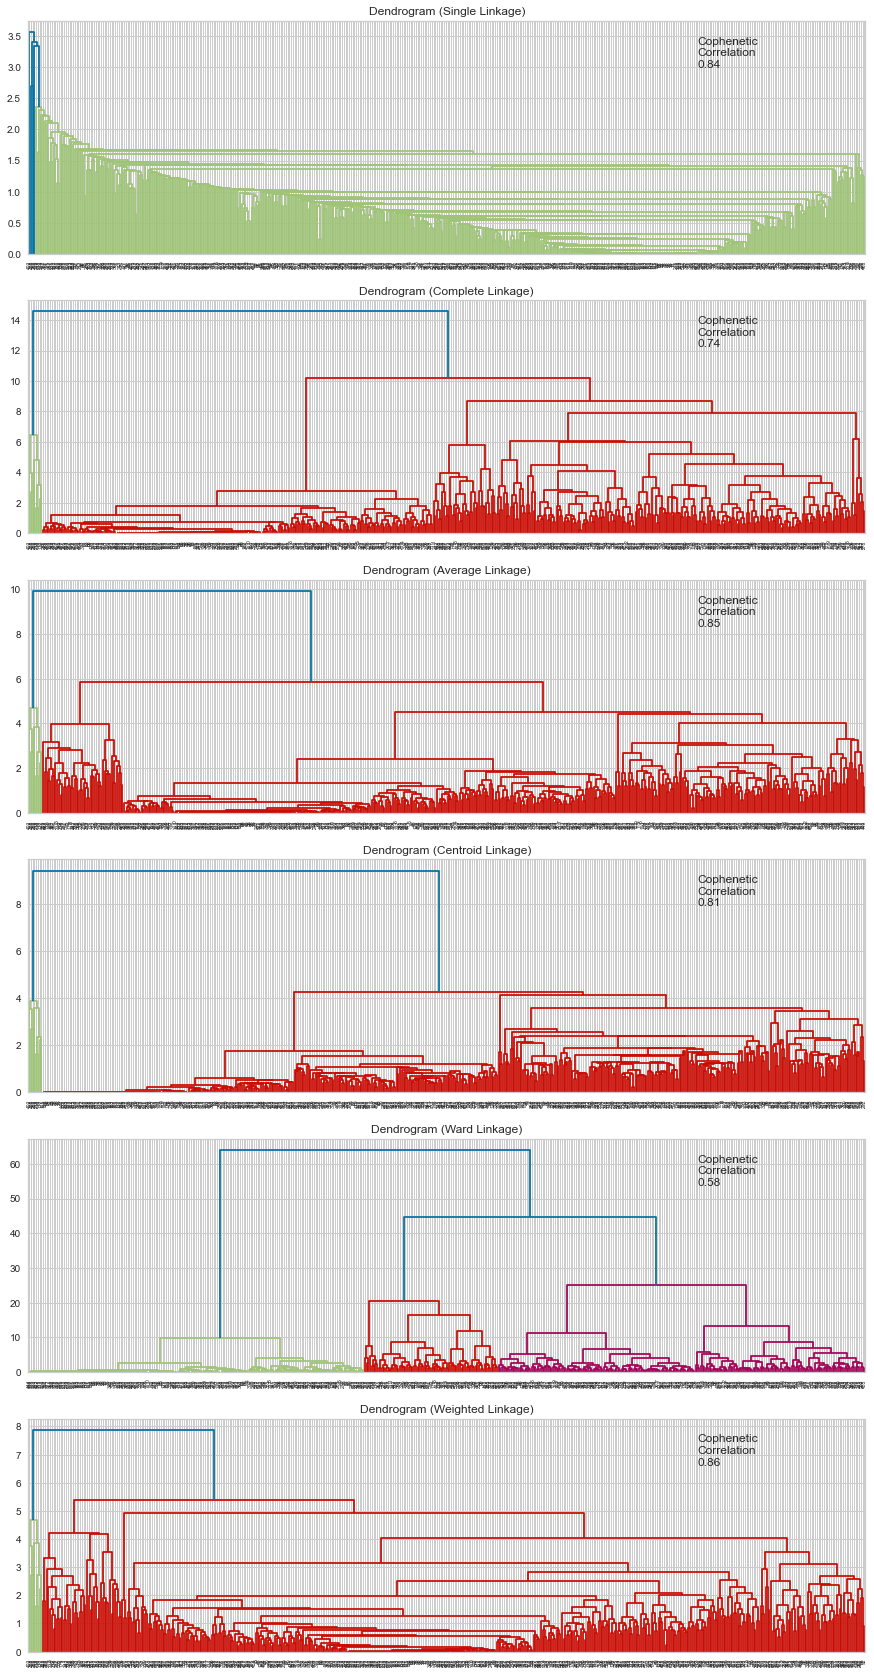

<IPython.core.display.Javascript object>

In [72]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Dendrogram with ward linkage shows distinct and separate cluster tree.**

In [73]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


<IPython.core.display.Javascript object>

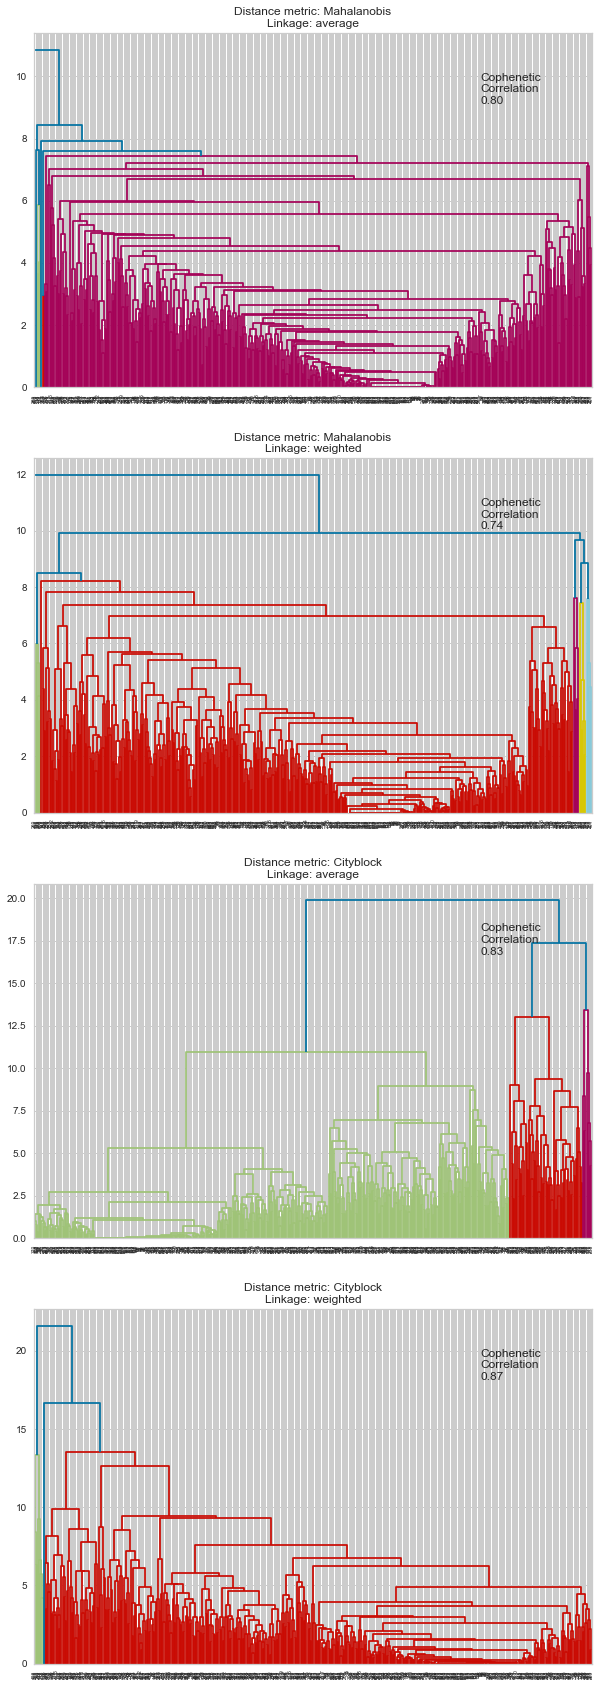

<IPython.core.display.Javascript object>

In [134]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

- Out of all the dendrograms we saw, it is clear that the dendrogram with Ward linkage gave us separate and distinct clusters.
- 4 would be the appropriate number of the clusters from the dendrogram with Ward linkage method.

**Let's move ahead with 4 clusters, Euclidean distance, and average linkage.**

In [135]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [136]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [137]:
hc_df.head()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,HC_segments
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,3
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,0
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,2
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,0
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,3


<IPython.core.display.Javascript object>

In [138]:
df2.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,HC_Clusters,K_means_segments,HC_segments
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0,0,1,3
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7,2,2,0
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11,0,0,2
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8,2,2,0
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2,0,1,3


<IPython.core.display.Javascript object>

In [139]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling and Comparison
### Cluster Profiling: K-means Clustering

In [140]:
km_cluster_profile = df1.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [141]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Goals_Scored"].count().values
)

<IPython.core.display.Javascript object>

In [142]:
km_cluster_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,1.258621,1.086207,112.827586,2862.603448,39.741379,179.656897,655.196552,159.051724,8.706897,10.948276,0.000000,58
1,0.337398,0.390244,17.646341,449.780488,6.971545,50.710976,80.154472,55.865854,0.841463,1.304878,0.000000,246
2,8.687500,6.734375,141.468750,2464.921875,33.437500,624.568750,660.143750,843.593750,16.171875,9.359375,1.593750,64
3,1.814815,2.259259,73.287037,1869.787037,27.398148,281.640741,372.864815,278.925926,4.620370,6.518519,0.037037,108


<IPython.core.display.Javascript object>

### Cluster Profiling: Hierarchical Clustering 

In [143]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [144]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Goals_Scored"].count().values
)

<IPython.core.display.Javascript object>

In [145]:
hc_cluster_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,HC_Clusters,K_means_segments,count_in_each_segment
HC_segments,,,,,,,,,,,,,
0,9.925926,6.537037,140.944444,2360.370370,31.481481,566.411111,646.914815,953.370370,15.851852,9.148148,1.962963,2.037037,54
1,1.482456,1.640351,54.315789,1364.087719,20.789474,185.628947,262.635088,224.508772,3.070175,4.429825,0.000000,2.035088,114
2,1.478632,2.102564,103.239316,2614.273504,36.470085,304.364103,570.646154,206.205128,8.136752,9.811966,0.000000,1.410256,117
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,0.000000,1.000000,191


<IPython.core.display.Javascript object>

### K-Means Clustering vs Hierarchical Clustering Comparison

In [146]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,1.258621,1.086207,112.827586,2862.603448,39.741379,179.656897,655.196552,159.051724,8.706897,10.948276,0.000000,58
1,0.337398,0.390244,17.646341,449.780488,6.971545,50.710976,80.154472,55.865854,0.841463,1.304878,0.000000,246
2,8.687500,6.734375,141.468750,2464.921875,33.437500,624.568750,660.143750,843.593750,16.171875,9.359375,1.593750,64
3,1.814815,2.259259,73.287037,1869.787037,27.398148,281.640741,372.864815,278.925926,4.620370,6.518519,0.037037,108


<IPython.core.display.Javascript object>

In [147]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,HC_Clusters,K_means_segments,count_in_each_segment
HC_segments,,,,,,,,,,,,,
0,9.925926,6.537037,140.944444,2360.370370,31.481481,566.411111,646.914815,953.370370,15.851852,9.148148,1.962963,2.037037,54
1,1.482456,1.640351,54.315789,1364.087719,20.789474,185.628947,262.635088,224.508772,3.070175,4.429825,0.000000,2.035088,114
2,1.478632,2.102564,103.239316,2614.273504,36.470085,304.364103,570.646154,206.205128,8.136752,9.811966,0.000000,1.410256,117
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,0.000000,1.000000,191


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

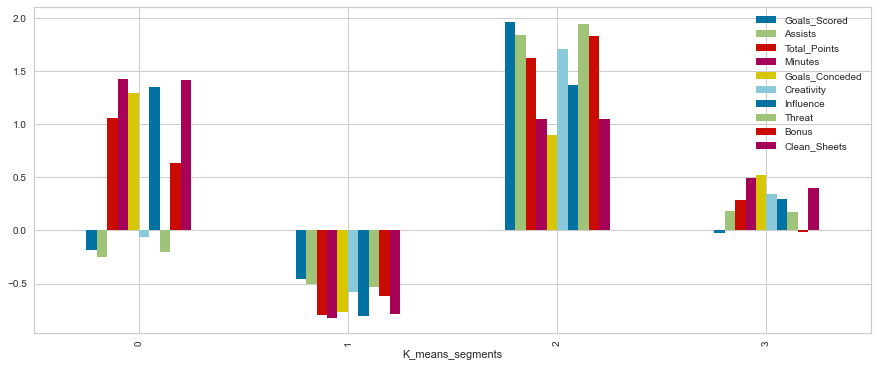

<IPython.core.display.Javascript object>

In [148]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<AxesSubplot:xlabel='HC_segments'>

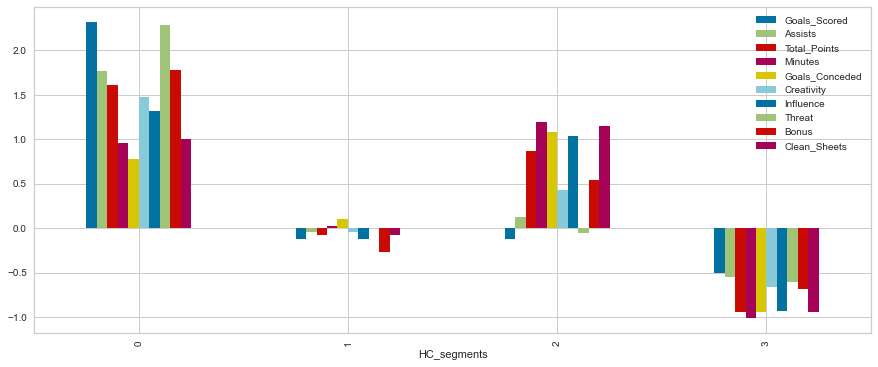

<IPython.core.display.Javascript object>

In [149]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

In [150]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [151]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [152]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Goals_Scored"].count().values
)

<IPython.core.display.Javascript object>

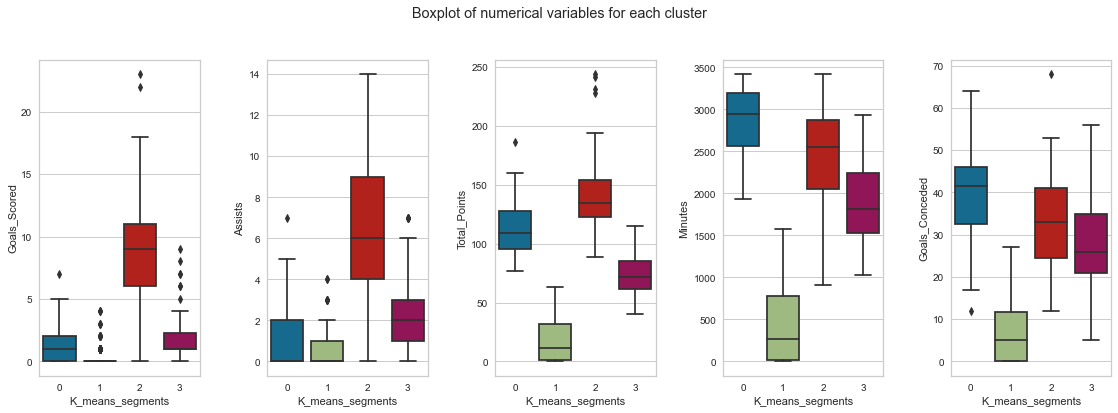

<IPython.core.display.Javascript object>

In [153]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_cols[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [154]:
hc_cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [155]:
hc_cluster_profile["count_in_each_segment"] = (
    df.groupby("HC_Clusters")["Goals_Scored"].count().values
)

<IPython.core.display.Javascript object>

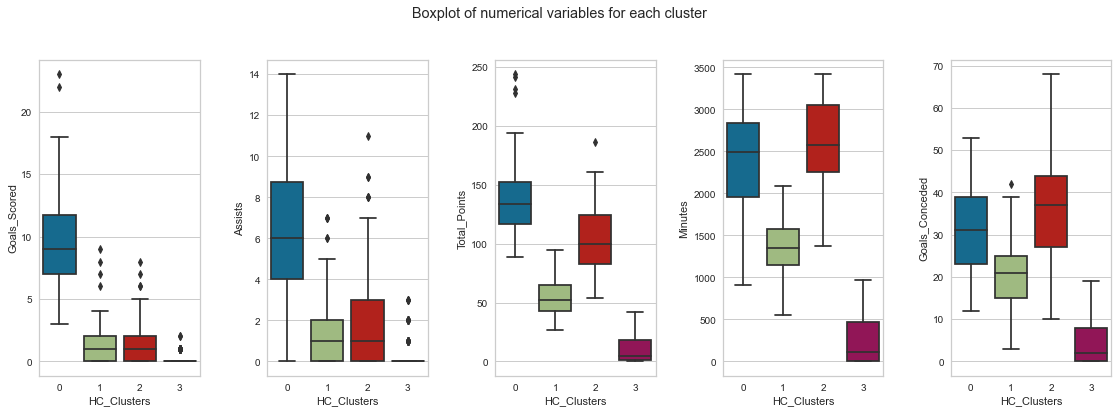

<IPython.core.display.Javascript object>

In [156]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_cols[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Cluster Comparison

**Cluster 0**
- 58 players lies in this cluster as per kmeans clustering
- this cluster has the highest Minutes played and Goals_Conceded and clean sheets than players in other clusters 
- players in this cluster has the second least goals scored and the least assist among all the players .

**Cluster 1**
- this cluster represents 51% of the players in our dataset
- players in this cluster has the lowest values on average for the different attributes 
- players in this cluster has the least total points on average.

**Cluster 2**
- the most dominant and valuable cluster in our dataset
- it contains best 64 players that are top in terms of number of goals scored, assists and total points.
- also these player has the highest creativity , influence, threat and bonus 

**Cluster 3**
- 108 players out of 467 represented in this cluster
- second lowest score on average in terms of total points and minutes 